In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


In [2]:
df = pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")

In [3]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
df['Sex'].unique()


array(['M', 'F'], dtype=object)

In [14]:
df['Sex']= df['Sex'].map({"M":0,"F":1})

In [10]:
df['ChestPainType'].unique()


array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])

In [11]:
df['RestingECG'].unique()


array(['Normal', 'ST', 'LVH'], dtype=object)

In [16]:
df['RestingECG'] = le.fit_transform(df['RestingECG'])

In [12]:
df['ExerciseAngina'].unique()


array(['N', 'Y'], dtype=object)

In [17]:
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])

In [13]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [18]:
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


<Axes: >

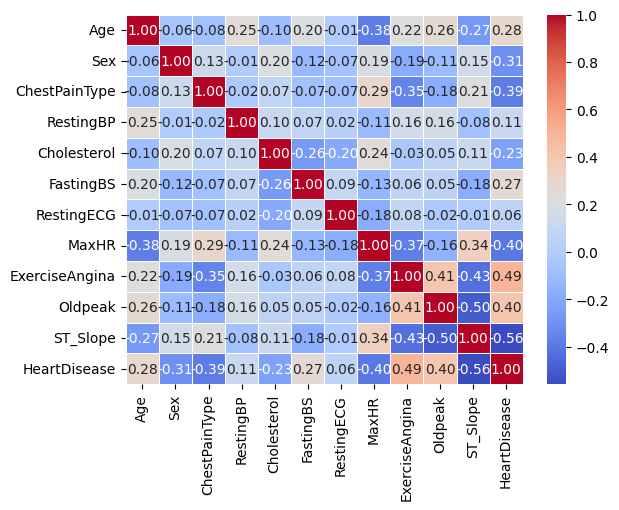

In [31]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap='coolwarm',linewidths=0.5)

In [34]:
df = df.drop(['RestingECG'],axis = 1)

KeyError: "['RestingECG'] not found in axis"

In [35]:
df = df.drop(['RestingBP'],axis = 1)

In [37]:
df

,Age,Sex,ChestPainType,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,289,0,172,0,0.0,2,0
1,49,1,2,180,0,156,0,1.0,1,1
2,37,0,1,283,0,98,0,0.0,2,0
3,48,1,0,214,0,108,1,1.5,1,1
4,54,0,2,195,0,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,264,0,132,0,1.2,1,1
914,68,0,0,193,1,141,0,3.4,1,1
915,57,0,0,131,0,115,1,1.2,1,1
916,57,1,1,236,0,174,0,0.0,1,1


In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[["Age", "Cholesterol", "MaxHR", "Oldpeak"]] = scaler.fit_transform(df[["Age", "Cholesterol", "MaxHR", "Oldpeak"]])


In [41]:
df

,Age,Sex,ChestPainType,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,0,1,0.479270,0,0.788732,0,0.295455,2,0
1,0.428571,1,2,0.298507,0,0.676056,0,0.409091,1,1
2,0.183673,0,1,0.469320,0,0.267606,0,0.295455,2,0
3,0.408163,1,0,0.354892,0,0.338028,1,0.465909,1,1
4,0.530612,0,2,0.323383,0,0.436620,0,0.295455,2,0
...,...,...,...,...,...,...,...,...,...,...
913,0.346939,0,3,0.437811,0,0.507042,0,0.431818,1,1
914,0.816327,0,0,0.320066,1,0.570423,0,0.681818,1,1
915,0.591837,0,0,0.217247,0,0.387324,1,0.431818,1,1
916,0.591837,1,1,0.391376,0,0.802817,0,0.295455,1,1


In [42]:
df.describe()

,Age,Sex,ChestPainType,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,0.520630,0.210240,0.781046,0.329684,0.233115,0.540911,0.404139,0.396291,1.361656,0.553377
std,0.192502,0.407701,0.956519,0.181400,0.423046,0.179298,0.490992,0.121201,0.607056,0.497414
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.387755,0.000000,0.000000,0.287313,0.000000,0.422535,0.000000,0.295455,1.000000,0.000000
50%,0.530612,0.000000,0.000000,0.369818,0.000000,0.549296,0.000000,0.363636,1.000000,1.000000
75%,0.653061,0.000000,2.000000,0.442786,0.000000,0.676056,1.000000,0.465909,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000


# Model Training

In [43]:
X = df.drop('HeartDisease',axis = 1)
y = df['HeartDisease']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)


from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy using Logistic Regression", accuracy)

Accuracu using Logistic Regression 0.8478260869565217


In [45]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)


from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy using RandomForestClassification", accuracy)

Accuracy using RandomForestClassification 0.8695652173913043


In [46]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)


from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy using SVC", accuracy)

Accuracy using SVC 0.8641304347826086
